In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
f = open("FINAL_cleaned_output.csv")
print f.readline()
d = np.loadtxt(f, delimiter=",", usecols = (0, 1, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18))

Index,�_�Rank,Song,Artist,Year,Lyrics,ids,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence



In [21]:
d1 = pd.DataFrame(data=d)
d1.columns = ["index","rank","year","energy","liveness","tempo","speechiness","acousticness","instrumentalness","timesig","danceability","key","duration","loudness","valence"]
print d1.describe()

             index         rank         year       energy     liveness  \
count  1274.000000  1274.000000  1274.000000  1274.000000  1274.000000   
mean    785.591052    50.484301  2007.361068     0.690180     0.177648   
std     467.282818    29.357217     4.662524     0.165599     0.135908   
min       0.000000     1.000000  2000.000000     0.016400     0.021000   
25%     375.250000    24.000000  2003.000000     0.584000     0.091500   
50%     784.500000    51.000000  2007.000000     0.709500     0.124000   
75%    1192.750000    76.000000  2011.000000     0.816750     0.225750   
max    1598.000000   100.000000  2015.000000     0.987000     0.854000   

             tempo  speechiness  acousticness  instrumentalness      timesig  \
count  1274.000000  1274.000000   1274.000000       1274.000000  1274.000000   
mean    120.143451     0.102686      0.157085          0.011261     3.982732   
std      28.494104     0.098734      0.199296          0.079076     0.253212   
min      57.1

* The following code uses an 80/20 train-test of split to account for possible overfitting of the model. 
* Backward selection will be used to arrive a model for predicting song popularity. 
* Time signature and duration have been removed already because they are the same across the board for all songs.

In [53]:
allX = pd.DataFrame(data=d1, columns=["energy", "liveness", "tempo", "speechiness", "acousticness", "instrumentalness", "danceability", "key", "loudness", "valence"]) 
y = pd.DataFrame(data=d1, columns=["rank"]) 

In [55]:
x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          1.44e-300
Time:                        18:23:12   Log-Likelihood:                -4884.1
No. Observations:                1019   AIC:                             9788.
Df Residuals:                    1009   BIC:                             9837.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy              43.8252      5.980      7.328      0.000      32.090      55.561
liveness             0.8854      6.848      0.129      0.897     -12.552      14.323
tempo                0.0575      0.030      1.913      0.056      -0.001       0.117
speechiness         -8.9000      9.407     -0.946      0.344     -27.359       9.559
acousticness        18.5400      5.116      3.624      0.000       8.500      28.580
instrumentalness   -16.5249     12.659     -1.305      0.192     -41.367       8.317
danceability        -0.8224      6.161     -0.133      0.894     -12.911      11.267
key                  0.3841      0.258      1.487      0.137      -0.123       0.891
loudness            -2.6674      0.425     -6.272      0.000      -3.502      -1.833
valence            -10.0086      4.889     -2.047      0.041     -19.603      -0.414
==============================================================================
Omnibus:                      387.767   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.000
Skew:                          -0.040   Prob(JB):                     5.11e-12
Kurtosis:                       1.896   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In many runs of the above train-test split, danceability was most commonly associated with the highest p-value. It will therefore be removed from the model.

In [56]:
allX = pd.DataFrame(data=d1, columns=["energy", "liveness", "tempo", "speechiness", "acousticness", "instrumentalness", "key", "loudness", "valence"]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     318.5
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          8.73e-288
Time:                        18:23:22   Log-Likelihood:                -4896.1
No. Observations:                1019   AIC:                             9810.
Df Residuals:                    1010   BIC:                             9855.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy              45.6037      5.612      8.126      0.000      34.590      56.617
liveness            -1.0826      6.994     -0.155      0.877     -14.807      12.642
tempo                0.0452      0.031      1.476      0.140      -0.015       0.105
speechiness        -12.5599      9.774     -1.285      0.199     -31.740       6.620
acousticness        15.2015      5.228      2.908      0.004       4.943      25.460
instrumentalness   -24.1135     12.056     -2.000      0.046     -47.772      -0.455
key                  0.4816      0.259      1.858      0.063      -0.027       0.990
loudness            -2.8067      0.411     -6.824      0.000      -3.614      -2.000
valence            -13.1142      4.461     -2.939      0.003     -21.869      -4.359
==============================================================================
Omnibus:                      391.145   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.039
Skew:                           0.032   Prob(JB):                     5.01e-12
Kurtosis:                       1.895   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In many runs of the above train-test split, liveness was most commonly associated with the highest p-value. It will therefore be removed from the model.

In [58]:
allX = pd.DataFrame(data=d1, columns=["energy", "tempo", "speechiness", "acousticness", "instrumentalness", "key", "loudness", "valence"]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     364.6
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          1.02e-291
Time:                        18:23:44   Log-Likelihood:                -4883.3
No. Observations:                1019   AIC:                             9783.
Df Residuals:                    1011   BIC:                             9822.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy              43.6202      5.387      8.098      0.000      33.049      54.191
tempo                0.0562      0.031      1.819      0.069      -0.004       0.117
speechiness        -11.7024      9.342     -1.253      0.211     -30.034       6.629
acousticness         7.1488      5.154      1.387      0.166      -2.964      17.262
instrumentalness   -20.5194     12.808     -1.602      0.109     -45.653       4.614
key                  0.1015      0.256      0.397      0.692      -0.400       0.603
loudness            -2.8710      0.397     -7.224      0.000      -3.651      -2.091
valence             -8.8080      4.473     -1.969      0.049     -17.585      -0.031
==============================================================================
Omnibus:                      480.899   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.084
Skew:                           0.024   Prob(JB):                     1.09e-12
Kurtosis:                       1.862   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In many runs of the above train-test split, key was most commonly associated with the highest p-value. It will therefore be removed from the model.

In [70]:
allX = pd.DataFrame(data=d1, columns=["energy", "tempo", "speechiness", "acousticness", "instrumentalness","loudness", "valence"]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     421.9
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          6.62e-295
Time:                        18:27:09   Log-Likelihood:                -4888.2
No. Observations:                1019   AIC:                             9790.
Df Residuals:                    1012   BIC:                             9825.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy              43.3501      5.310      8.163      0.000      32.930      53.771
tempo                0.0509      0.030      1.694      0.091      -0.008       0.110
speechiness        -12.7761      9.597     -1.331      0.183     -31.608       6.056
acousticness        11.1670      5.110      2.185      0.029       1.140      21.194
instrumentalness   -28.9442     12.016     -2.409      0.016     -52.523      -5.365
loudness            -3.1637      0.389     -8.123      0.000      -3.928      -2.399
valence             -9.4444      4.436     -2.129      0.034     -18.150      -0.739
==============================================================================
Omnibus:                      465.343   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.507
Skew:                           0.003   Prob(JB):                     1.46e-12
Kurtosis:                       1.867   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In many runs of the above train-test split, speechiness was most commonly associated with the highest p-value. It will therefore be removed from the model.

In [75]:
allX = pd.DataFrame(data=d1, columns=["energy", "tempo", "acousticness", "instrumentalness", "loudness", "valence"]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     506.6
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          7.55e-301
Time:                        18:27:43   Log-Likelihood:                -4879.2
No. Observations:                1019   AIC:                             9770.
Df Residuals:                    1013   BIC:                             9800.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
energy              44.9415      5.255      8.552      0.000      34.630      55.253
tempo                0.0569      0.030      1.886      0.060      -0.002       0.116
acousticness         9.0933      5.150      1.766      0.078      -1.013      19.199
instrumentalness   -13.9799     11.511     -1.214      0.225     -36.569       8.609
loudness            -2.7944      0.384     -7.283      0.000      -3.547      -2.041
valence            -10.3750      4.297     -2.414      0.016     -18.808      -1.942
==============================================================================
Omnibus:                      374.746   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.261
Skew:                           0.019   Prob(JB):                     7.39e-12
Kurtosis:                       1.902   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In ~10 runs of the above train-test split, instrumentalness was most commonly associated with the highest p-value. It will therefore be removed from the model.

In [77]:
allX = pd.DataFrame(data=d1, columns=["energy", "tempo", "acousticness","loudness", "valence"]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     596.1
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          7.22e-299
Time:                        18:28:16   Log-Likelihood:                -4887.9
No. Observations:                1019   AIC:                             9786.
Df Residuals:                    1014   BIC:                             9810.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
energy          43.4776      5.306      8.194      0.000      33.065      53.890
tempo            0.0439      0.030      1.453      0.146      -0.015       0.103
acousticness    17.7661      5.213      3.408      0.001       7.537      27.996
loudness        -2.6769      0.388     -6.897      0.000      -3.439      -1.915
valence         -7.2576      4.373     -1.660      0.097     -15.839       1.323
==============================================================================
Omnibus:                      449.582   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.018
Skew:                           0.013   Prob(JB):                     1.86e-12
Kurtosis:                       1.872   Cond. No.                         836.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In many of the above train-test split, tempo was most commonly associated with the highest p-value. It will therefore be removed from the model.

In [78]:
allX = pd.DataFrame(data=d1, columns=["energy", "acousticness","loudness", "valence"]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     766.8
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          6.87e-305
Time:                        18:28:45   Log-Likelihood:                -4885.2
No. Observations:                1019   AIC:                             9778.
Df Residuals:                    1015   BIC:                             9798.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
energy          49.7357      3.863     12.873      0.000      42.154      57.317
acousticness    19.0134      5.154      3.689      0.000       8.899      29.128
loudness        -3.1761      0.353     -9.000      0.000      -3.869      -2.484
valence        -10.0197      4.312     -2.324      0.020     -18.481      -1.559
==============================================================================
Omnibus:                      322.813   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.894
Skew:                          -0.017   Prob(JB):                     2.41e-11
Kurtosis:                       1.927   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All features now have p-values below the widely-accepted threshold of 0.05. This marks the end of the backward selection. Our initial model therefore includes energy, acousticness, loudness, and valence. 

**To summarize, we removed features in this order:**
1. danceability
2. liveness
3. key
4. speechiness
5. instrumentalness
6. tempo

The predictive value of our model will now be visualized.

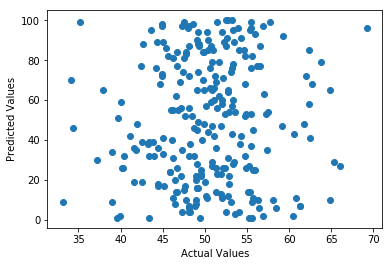

In [88]:
x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()

predictionsOnTest = model.predict(x_test)
plt.scatter(predictionsOnTest, y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Due to concern about multicollinearity, we will explore the relationship between a few features that we believe could be strongly correlated.

In [99]:
featsInModel = ["energy","acousticness","loudness","valence"] 

for feat in featsInModel:
    print "CURRENT FEAT IS ",feat
    formalizedFeat = pd.DataFrame(data=d1, columns=[feat]) 
    for feat2 in featsInModel:
        if (feat2 != feat):
            formalizedFeat2 = pd.DataFrame(data=d1, columns=[feat2]) 
            x_train, x_test, y_train, y_test = train_test_split(formalizedFeat, formalizedFeat2, test_size=0.2)
            model = sm.OLS(y_train, x_train).fit()
            print feat2," has r^2 value ",model.rsquared," and p-value ",model.pvalues," with corr coeff ", model.params

CURRENT FEAT IS  energy
acousticness  has r^2 value  0.257777616063  and p-value  energy    6.207972e-68
dtype: float64  with corr coeff  energy    0.184268
dtype: float64
loudness  has r^2 value  0.703563773408  and p-value  energy    4.865733e-271
dtype: float64  with corr coeff  energy   -7.512896
dtype: float64
valence  has r^2 value  0.867158587823  and p-value  energy    0.0
dtype: float64  with corr coeff  energy    0.774801
dtype: float64
CURRENT FEAT IS  acousticness
energy  has r^2 value  0.253152121686  and p-value  acousticness    1.479744e-66
dtype: float64  with corr coeff  acousticness    1.420677
dtype: float64
loudness  has r^2 value  0.4799124466  and p-value  acousticness    1.096066e-146
dtype: float64  with corr coeff  acousticness   -17.36091
dtype: float64
valence  has r^2 value  0.287866051499  and p-value  acousticness    4.180395e-77
dtype: float64  with corr coeff  acousticness    1.213141
dtype: float64
CURRENT FEAT IS  loudness
energy  has r^2 value  0.7023

** RE: Energy** 
* Energy appears to be moderately correlated with loudness, and strongly-correlated with valence. 
* The relationship between energy and acousticness, however, is weak.

** RE: Acousticness**
* Acousticness appears to have weak relationships with all three other features in our model.

** RE: Loudness & valence**
* Moderately correlated with one another

** The most notable collinearity is that of energy & valence. I will identify which feature explains the most variance in rank, to determine which to leave in our model. **

In [108]:
energy = pd.DataFrame(data=d1, columns=["energy"]) 

x_train, x_test, y_train, y_test = train_test_split(energy, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2419.
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          3.03e-271
Time:                        19:13:03   Log-Likelihood:                -4968.5
No. Observations:                1019   AIC:                             9939.
Df Residuals:                    1018   BIC:                             9944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
energy        69.2166      1.407     49.187      0.000      66.455      71.978
==============================================================================
Omnibus:                      119.304   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.461
Skew:                           0.072   Prob(JB):                     5.42e-08
Kurtosis:                       2.124   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
valence = pd.DataFrame(data=d1, columns=["valence"]) 

x_train, x_test, y_train, y_test = train_test_split(valence, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1632.
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          1.13e-213
Time:                        19:13:03   Log-Likelihood:                -5097.8
No. Observations:                1019   AIC:                         1.020e+04
Df Residuals:                    1018   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
valence       77.2399      1.912     40.392      0.000      73.487      80.992
==============================================================================
Omnibus:                       97.856   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.749
Skew:                           0.025   Prob(JB):                     3.47e-07
Kurtosis:                       2.164   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Energy appears to be a better singular predictor of rank. Let's remove valence from our initial predictive model: 

In [192]:
finalX = pd.DataFrame(data=d1, columns=["energy", "acousticness","loudness"]) 

x_train, x_test, y_train, y_test = train_test_split(finalX, y, test_size=0.2)
finalModel = sm.OLS(y_train, x_train).fit()
finalModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     973.4
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          3.45e-298
Time:                        19:18:50   Log-Likelihood:                -4903.2
No. Observations:                1019   AIC:                             9812.
Df Residuals:                    1016   BIC:                             9827.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
energy          46.4417      2.430     19.112      0.000      41.674      51.210
acousticness    14.8170      5.212      2.843      0.005       4.589      25.045
loudness        -2.6430      0.322     -8.220      0.000      -3.274      -2.012
==============================================================================
Omnibus:                      527.391   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.337
Skew:                          -0.002   Prob(JB):                     5.84e-13
Kurtosis:                       1.848   Cond. No.                         36.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's visualize our model one last time: 

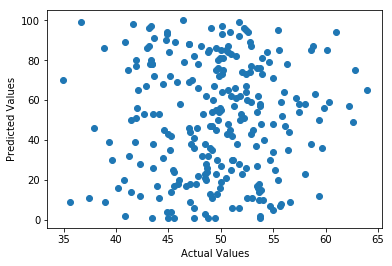

In [193]:
predictionsOnTest = finalModel.predict(x_test)
plt.scatter(predictionsOnTest, y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Our first model included energy, acousticness, loudness, and valence. We arrived at this model through backward selection, removing features in this order:

1. danceability
2. liveness
3. key
4. speechiness
5. instrumentalness
6. tempo

However, multicollinearity of energy & valence was noticed. This prompted us to examine whether energy or valence singularly predicts bet

**Sources consulted: **
* Least squares modeling: https://medium.com/@rob3hr/lost-when-it-comes-to-multi-linear-regression-988785c3fa55
* Train-test split: Lab 4 & https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 
* Backward elimination: https://www.ndsu.edu/faculty/horsley/Stepwise_regression_(HZAU).pdf 
* Capturing multicollinearity: https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels 